<a href="https://colab.research.google.com/github/Paul-mwaura/ML-Hackathons/blob/main/Contraceptives_Use_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding

<a href="https://zindi.africa/competitions/usaids-intelligent-forecasting-challenge-model-future-contraceptive-use">USAID's Intelligent Forecasting Challenge: Model Future Contraceptive Use</a>

Access to contraceptives is important for couples to identify whether, when and how often to have children.

Middle and low income countries are faced with the problem of accurately predicting quatity of contraceptives which is crucial for health service delivery. This may be attributed to lack of sufficient data, limited number of staff and inadequate systems.

Thereforeaccurate focasting of contraceptive consumption could help save lives, money and time by making sure health service deliveries are allocated the right amount of contraceptives thereby reducing waste in the supply chain.

## Data Understanding

<a href="https://zindi.africa/competitions/usaids-intelligent-forecasting-challenge-model-future-contraceptive-use/data">Files available for download</a>
>>
* Train.csv - you will use this data to train your model on
* SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the IDs must be correct.
* monthly_cases.csv - monthly information about distribution of contraceptives in from January to June 2019
* annual_cases.csv - annual information about distribution of contraceptives per health center for 3 years
* data_dictionary.csv - variable defintions for each csv file
* product.csv - defintion of each contraceptive
* Recommended_Supplementary_Data_Sources.docx - a list of extra data recommended by USAID
* service_delivery_site_data.csv - information about delivery sites, including the latitude and longitude
* Table_of_Contents.xlsx - description of the files available
* contraceptive_case_data_annual.csv - annual information about distribution of contraceptives per health center for 3 years

**Train Dataset Variables**

The dataset was provided by <a href="https://zindi.africa/competitions/usaids-intelligent-forecasting-challenge-model-future-contraceptive-use/data">Zindi</a> and the Train dataset had the following variables:
>>
* year -	The year of the observation
*	month -	The month of the observation
*	region -	The higher level geographical area within Côte D'ivoire
*	district -	The lower level geographical area within Côte D'ivoire
*	site_code	- The actual health service delivery site
*	product_code	- The unique identifier for each commodity
*	stock_initial	- Stock in hand of previous period. 
*	stock_received	- Total quantity received in last period. 
*	stock_distributed	- Quantity dispensed/consumed in last reporting 
*	stock_adjustment	- All kinds of losses/ adjustments made 
*	stock_end	Current - physical count of stock on hand. 
*	average_monthly_consumption	- Average monthly consumption, for last three mo.
*	stock_stockout_days	- Total number of days facility was out of stock.
* stock_ordered	- The requested quantity. 

Installing dependencies
>>
We will be using Pandas Profiling Version 2.7.1

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.9MB/s 
     |████████████████████████████████| 3.1MB 7.8MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 604kB 21.4MB/s 
     |████████████████████████████████| 296kB 27.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=54b08d2b77f7b19f71889965854dd9ecfbf3eeb9a3e2b9da495b9df750c50a17
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=578e852499a25e12e185091af569cb488b847df56b241e1cc349eb5766d3c545
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

**Import Necessary Libraries**

In [ ]:
# Import necessary libraries.
#
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pty
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly Libraries.
#
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
from plotly.subplots import make_subplots
from plotly import graph_objects
import cufflinks as cf
import plotly.offline as iplot

import calendar
from IPython.display import display,HTML
import pandas_profiling as pp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the Dataset.

In [ ]:
# Load the dataset
#
df = pd.read_csv("Train.csv")
profile = pp.ProfileReport(df)

profile

In [ ]:
# Preview the head of the dataset.
#
df.head()

year  month  ... stock_stockout_days stock_ordered
0  2019      1  ...                   0         100.0
1  2019      1  ...                   0          10.0
2  2019      1  ...                   0           0.0
3  2019      1  ...                   0           0.0
4  2019      1  ...                   0           0.0

[5 rows x 14 columns]

In [ ]:
# Preview Datatypes.
#
df.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_stockout_days              int64
stock_ordered                  float64
dtype: object

## Data Cleaning.

In [ ]:
# Checking for null values.
#
df.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

In [ ]:
df = df.dropna(subset=['stock_ordered'])
df.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

#### Check for duplicated Values

In [ ]:
# Checking for duplicated values.
#
df.duplicated().sum()

0

In [ ]:
# Check for the size of the dataset.
#
df.shape

(34990, 14)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
df['product_code'].value_counts()

AS27133    5292
AS27000    5158
AS27134    4617
AS27137    4349
AS27132    4325
AS27138    4014
AS27139    2298
AS46000    1917
AS42018    1491
AS17005    1184
AS21126     345
Name: product_code, dtype: int64

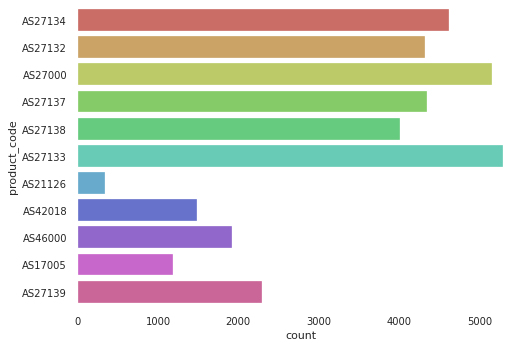

In [ ]:
df.product_code.value_counts()
sns.countplot(y = 'product_code', data = df, palette = 'hls')

plt.show()

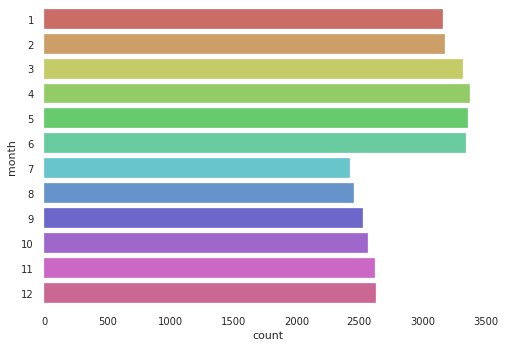

In [ ]:

sns.countplot(y = 'month', data = df, palette = 'hls')

plt.show()

### Bivariate Analysis

In [ ]:
#create a new dataframe by selecting month, site_code & product_code
new = df[["month","site_code","product_code"]].copy()
#convert ALL columns to strings, you can simply use:
new = new.astype(str)
new.dtypes


month           object
site_code       object
product_code    object
dtype: object

In [ ]:
# concatenating new dataframe  with ID column
# overwriting ID column
df["ID"]= df['year'].astype(str)
df["ID"]= df["ID"].str.cat(new, sep ="X")
df = df.set_index('ID')
df.head()

sub = df.copy()

#### Label Encoding

In [ ]:
# Create a list of the categorical columns
#
cat = [col for col in df.columns if (df[col].dtype=='object')]
cat

['region', 'district', 'site_code', 'product_code']

In [ ]:
for i in cat:
  df[i] = pd.get_dummies(df[i])

df.head()

year  month  ...  stock_stockout_days  stock_ordered
ID                                 ...                                    
2019X1XC4001XAS27134  2019      1  ...                    0          100.0
2019X1XC4001XAS27132  2019      1  ...                    0           10.0
2019X1XC4001XAS27000  2019      1  ...                    0            0.0
2019X1XC4001XAS27137  2019      1  ...                    0            0.0
2019X1XC4001XAS27138  2019      1  ...                    0            0.0

[5 rows x 14 columns]

In [ ]:
# Check for null values in the encoded dataframe.
#
df.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

### Feature Engineering

In [ ]:
# Feature Engineering.
#
df['total_stock'] = df.stock_initial + df.stock_received
df['total_consumed'] = df.total_stock - df.stock_end
df['actual_stock_consumed'] = df.total_stock - df.stock_adjustment
df['rate_of_loss'] = df.stock_adjustment/df.total_stock
df['deficit_order'] = df.stock_ordered - df.stock_received
df.head(10)

year  month  ...  rate_of_loss  deficit_order
ID                                 ...                             
2019X1XC4001XAS27134  2019      1  ...         -0.72          100.0
2019X1XC4001XAS27132  2019      1  ...          0.00           10.0
2019X1XC4001XAS27000  2019      1  ...          0.00          -75.0
2019X1XC4001XAS27137  2019      1  ...          0.00            0.0
2019X1XC4001XAS27138  2019      1  ...          0.00            0.0
2019X1XC4001XAS27133  2019      1  ...          0.00          -50.0
2019X1XC4023XAS27000  2019      1  ...          0.00            0.0
2019X1XC4023XAS27133  2019      1  ...          0.00            0.0
2019X2XC4001XAS27134  2019      2  ...           NaN          100.0
2019X2XC4001XAS27132  2019      2  ...           NaN           10.0

[10 rows x 19 columns]

In [ ]:
# issue 
df.rate_of_loss.isnull().sum()

9544

In [ ]:
df.drop('rate_of_loss',1,inplace=True)

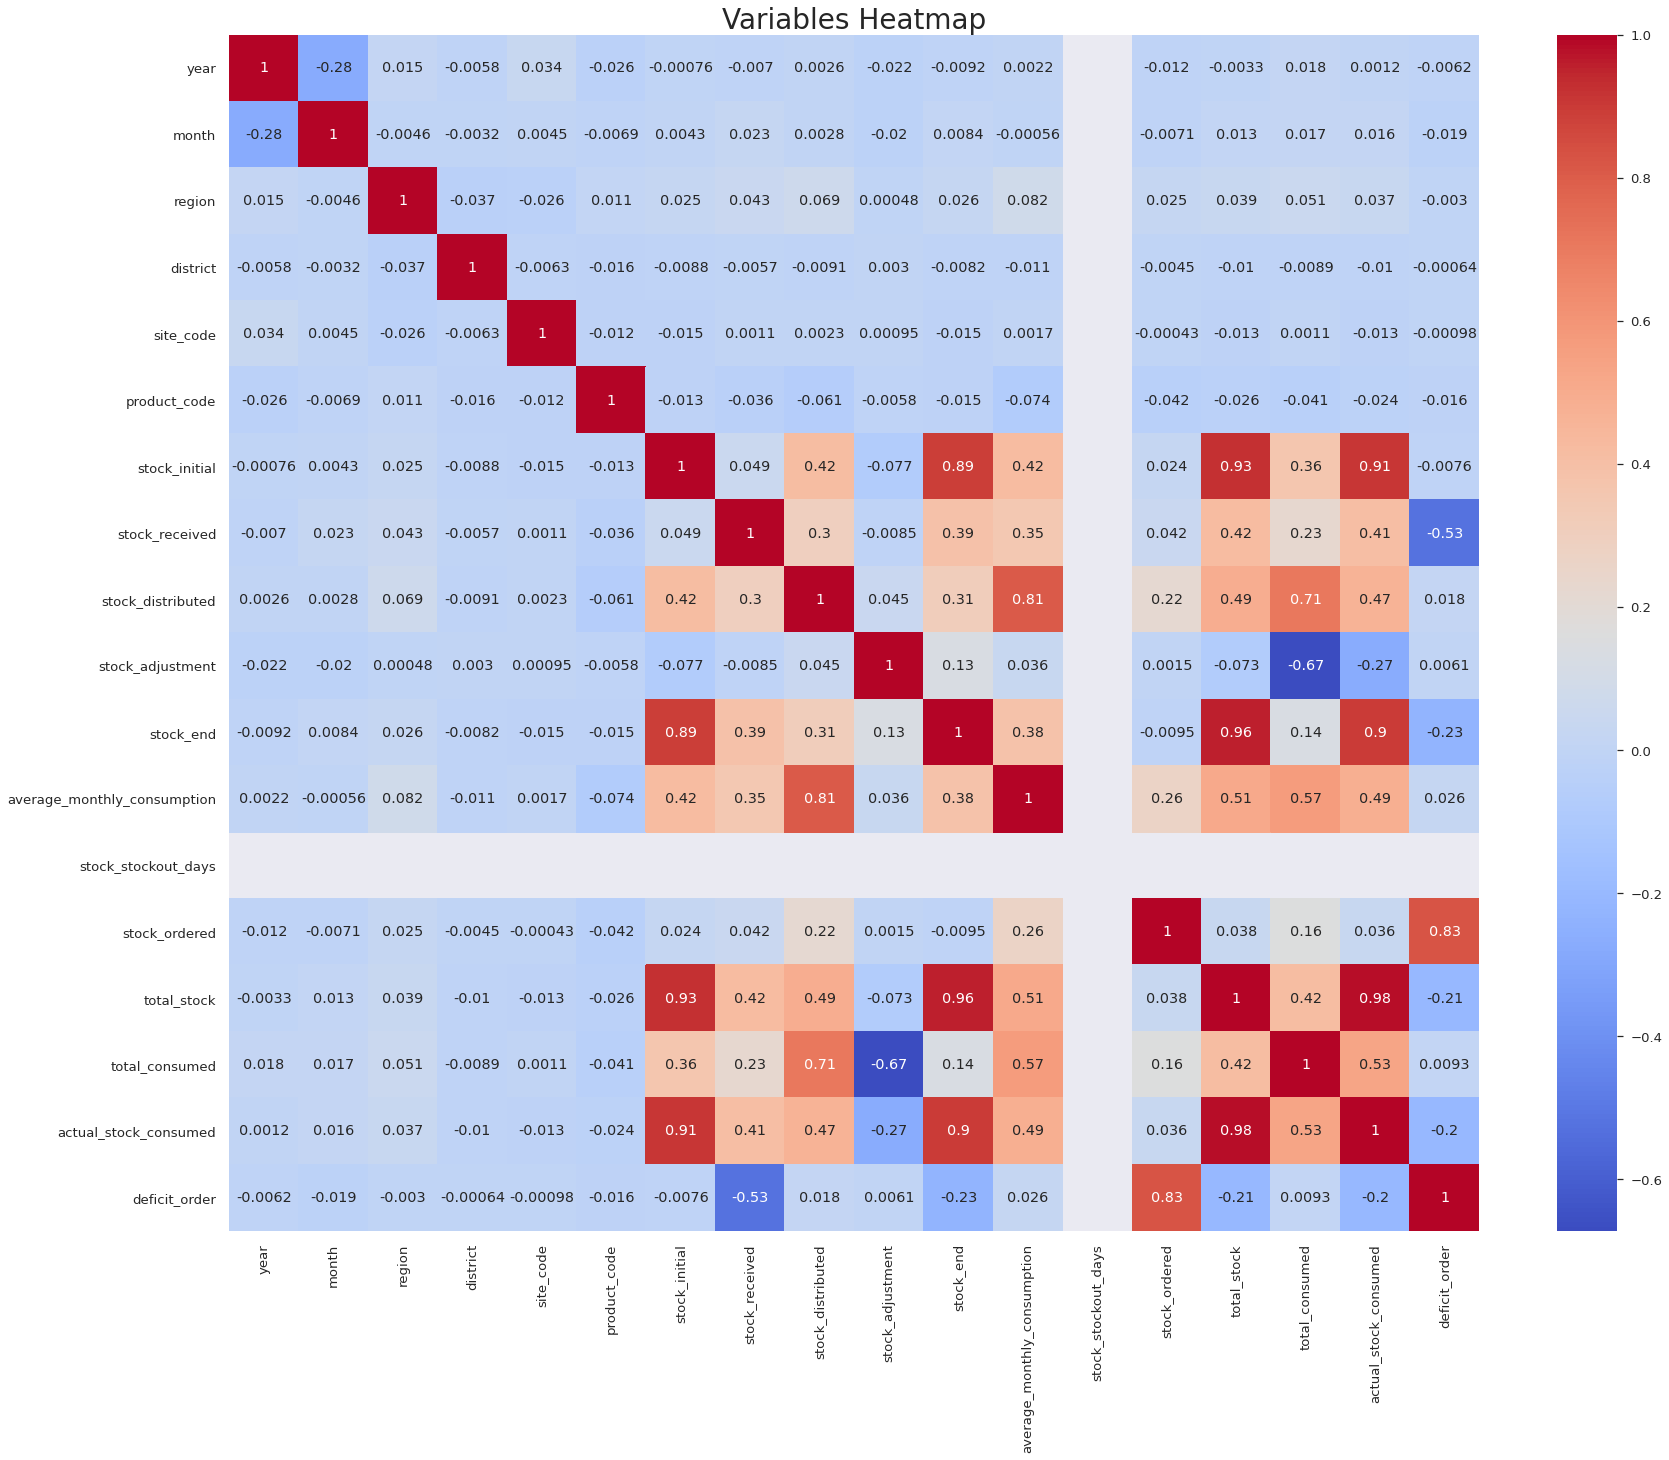

In [ ]:
# Plot a heatmap of the data.
#
plt.rcParams['figure.figsize']=(28,22)
sns.set(font_scale=1.2)
plt.title("Variables Heatmap", fontsize=28)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

### External Data Source Validation

> Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 
External validation can often be as simple as checking your data against a single number, as we will do here.

## Implementing the Solution

### XGBoost

>>
XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.

In [ ]:
# Preview top 5 rows of the dataset.
#
df.head()

year  month  ...  actual_stock_consumed  deficit_order
ID                                 ...                                      
2019X1XC4001XAS27134  2019      1  ...                    129          100.0
2019X1XC4001XAS27132  2019      1  ...                      3           10.0
2019X1XC4001XAS27000  2019      1  ...                     75          -75.0
2019X1XC4001XAS27137  2019      1  ...                      2            0.0
2019X1XC4001XAS27138  2019      1  ...                     45            0.0

[5 rows x 18 columns]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.booster().get_fscore()
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}

In [ ]:
feat_names = df.columns
feat_names

Index(['year', 'month', 'region', 'district', 'site_code', 'product_code',
       'stock_initial', 'stock_received', 'stock_distributed',
       'stock_adjustment', 'stock_end', 'average_monthly_consumption',
       'stock_stockout_days', 'stock_ordered', 'total_stock', 'total_consumed',
       'actual_stock_consumed', 'deficit_order'],
      dtype='object')

In [ ]:
# Evaluate the model.
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

model = XGBRegressor(n_estimators=70, learning_rate=0.4, booster="gbtree", max_depth=50)


**XGBoost Hyperparameter Tuning**

>>
We decided to set the number of estimators( n_estimators) as 70, because we could get a better model performance when n_estimators is between 55 and 90.
>>
The learning rate of 0.4 had the best performance compared to Learning rates of 0.3 and 0.5. 
>>
We observed that a maximum dpth above 40 would give us an optiomal model performance.
>>

In [ ]:
# Split the dataset into features and labels.
#
X = df.drop(['stock_stockout_days', 'stock_distributed', 'total_stock'], axis=1)
y = df['stock_distributed']


# Split the data into train and test.
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_test.shape

# Standardize the data.
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Fit XGB Model**


In [ ]:
# Train the XGB Model.
#
model.fit(X_train, y_train)

[07:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=50, min_child_weight=1, missing=None, n_estimators=70,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# make a single prediction
y_pred_xgb = model.predict(X_test)
y_pred_xgb

array([4.9173832e-06, 4.9173832e-06, 4.9173832e-06, ..., 7.9999967e+00,
       3.6414533e+00, 4.9173832e-06], dtype=float32)

In [ ]:
# empty dataframe
df_prediction = pd.DataFrame()
# add the array to df as a column
#df['prediction'] = y_pred.astype(bool)
df_prediction['prediction'] = y_pred_xgb.round(2)
df_prediction

prediction
0            0.00
1            0.00
2            0.00
3            0.00
4           42.00
...           ...
10492        0.00
10493        0.00
10494        8.00
10495        3.64
10496        0.00

[10497 rows x 1 columns]

In [ ]:

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})

comparison.describe()

Actual     Predicted
count  10497.000000  10497.000000
mean      14.354006     14.293390
std       37.446642     36.807941
min        0.000000     -0.363571
25%        0.000000      0.000005
50%        1.000000      0.999990
75%       12.000000     11.999990
max      864.000000    779.889832

In [ ]:
comparison.head(10)

Actual  Predicted
ID                                      
2017X8XC3010XAS27139        0   0.000005
2019X1XC1054XAS27133        0   0.000005
2016X6XC2057XAS42018        0   0.000005
2016X12XC4022XAS27132       0   0.000005
2018X9XC1028XAS27133       42  41.999886
2018X12XC2051XAS46000       0   0.000005
2016X4XC3022XAS27000        9   9.000007
2018X6XC4020XAS27132        0   0.000005
2017X4XC4017XAS27132        0   0.000005
2017X12XC3010XAS27133      52  52.000805

In [ ]:
 # Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error
#
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))


Mean Absolute Error: 0.4901096687392302
Mean Squared Error: 32.09179187489463
Root Mean Squared Error: 5.664961771706375


In [ ]:
# R2 Score
#
print(f"R2 Score: {metrics.r2_score(y_test, y_pred_xgb)*100}%")

R2 Score: 97.7111908380573%


In [ ]:
# Export the model.
#
import pickle

pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

[07:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Loading the Test Data**

In [ ]:
# Loading the Test Data.
#
test = pd.read_csv("test_raw.csv")
test_data = pd.read_csv("test.csv")
test_data

ID  year  ...  stock_stockout_days  stock_ordered
0     2019X7XC4001XAS21126  2019  ...                    0            0.0
1     2019X7XC4001XAS27134  2019  ...                    0          100.0
2     2019X7XC4001XAS27132  2019  ...                    0            0.0
3     2019X7XC4001XAS27000  2019  ...                    0            0.0
4     2019X7XC4001XAS27137  2019  ...                    0            0.0
...                    ...   ...  ...                  ...            ...
3084  2019X9XC5076XAS27000  2019  ...                    0           18.0
3085  2019X9XC5076XAS27139  2019  ...                   30           20.0
3086  2019X9XC5076XAS27137  2019  ...                    0            0.0
3087  2019X9XC5076XAS27138  2019  ...                    0            0.0
3088  2019X9XC5076XAS27133  2019  ...                    0            0.0

[3089 rows x 15 columns]

In [ ]:
test_X = test_data.drop(['stock_distributed','ID'], axis=1)
test_y = test_data['stock_distributed']


**Standardize the test data**

In [ ]:

# Standardize the data.
#
sc = StandardScaler()
test_X = sc.fit_transform(test_X)

model.fit(test_X, test_y)

[07:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=50, min_child_weight=1, missing=None, n_estimators=70,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Predictions**

In [ ]:
# make a single prediction
test_X_pred = model.predict(test_X)
test_X_pred

array([ 9.3281269e-06,  1.3000157e+01, -2.4676323e-04, ...,
        5.4746866e-05,  5.4746866e-05,  3.7133694e-04], dtype=float32)

**Load the Submission Data**

In [ ]:
SampleSubmission = pd.read_csv("SampleSubmission.csv")

In [ ]:

df_ID=pd.DataFrame()
df_ID[['year', 'month', 'site_code', 'product_code']] = test[['year', 'month', 'site_code', 'product_code']]
df_ID['prediction']=test_X_pred.round(2)
df_ID

year  month site_code product_code  prediction
0     2019      7     C4001      AS21126         0.0
1     2019      7     C4001      AS27134        13.0
2     2019      7     C4001      AS27132        -0.0
3     2019      7     C4001      AS27000         6.0
4     2019      7     C4001      AS27137         0.0
...    ...    ...       ...          ...         ...
3084  2019      9     C5076      AS27000         0.0
3085  2019      9     C5076      AS27139         0.0
3086  2019      9     C5076      AS27137         0.0
3087  2019      9     C5076      AS27138         0.0
3088  2019      9     C5076      AS27133         0.0

[3089 rows x 5 columns]

**Evaluate the model on Test Data**

In [ ]:
# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error
#
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, test_X_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, test_X_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, test_X_pred)))

Mean Absolute Error: 0.0003676950236901221
Mean Squared Error: 3.793390671599403e-07
Root Mean Squared Error: 0.0006159050796672652


**R2 Score**

In [ ]:
# Printing the clean test dataset.
#
df_ID.to_csv('submission_xgb_reg2.csv', index=False)
print(f"R2 Score: {metrics.r2_score(test_y, test_X_pred)*100}%")

R2 Score: 99.99999998390464%


Eventually we achieved:
>>
* R2 score: 99.99%

>>
* RMSE of: 0.0006159050796672652 


In [ ]:
submission_xgb = pd.read_csv("submission_xgb_reg2.csv")
submission_xgb.head()

year  month site_code product_code  prediction
0  2019      7     C4001      AS21126         0.0
1  2019      7     C4001      AS27134        13.0
2  2019      7     C4001      AS27132        -0.0
3  2019      7     C4001      AS27000         6.0
4  2019      7     C4001      AS27137         0.0